<a href="https://colab.research.google.com/github/edgarbernaling-arch/Desafio_1_Ciencia_de_datos_Edgar_Bernal/blob/main/Copia_de_AluraStoreLatam_Challegue1_Ciencia_de_datos_Edgar_Bernal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [43]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [44]:
# 1. Calcular el ingreso total para cada tienda (suma de la columna 'Precio')
ingreso_total_tienda1 = tienda['Precio'].sum()
ingreso_total_tienda2 = tienda2['Precio'].sum()
ingreso_total_tienda3 = tienda3['Precio'].sum()
ingreso_total_tienda4 = tienda4['Precio'].sum()

# 2. Mostrar los resultados
print(f"Ingreso Total Tienda 1: {ingreso_total_tienda1:,.1f}")
print(f"Ingreso Total Tienda 2: {ingreso_total_tienda2:,.1f}")
print(f"Ingreso Total Tienda 3: {ingreso_total_tienda3:,.1f}")
print(f"Ingreso Total Tienda 4: {ingreso_total_tienda4:,.1f}")

Ingreso Total Tienda 1: 1,150,880,400.0
Ingreso Total Tienda 2: 1,116,343,500.0
Ingreso Total Tienda 3: 1,098,019,600.0
Ingreso Total Tienda 4: 1,038,375,700.0


### GRÁFICO:

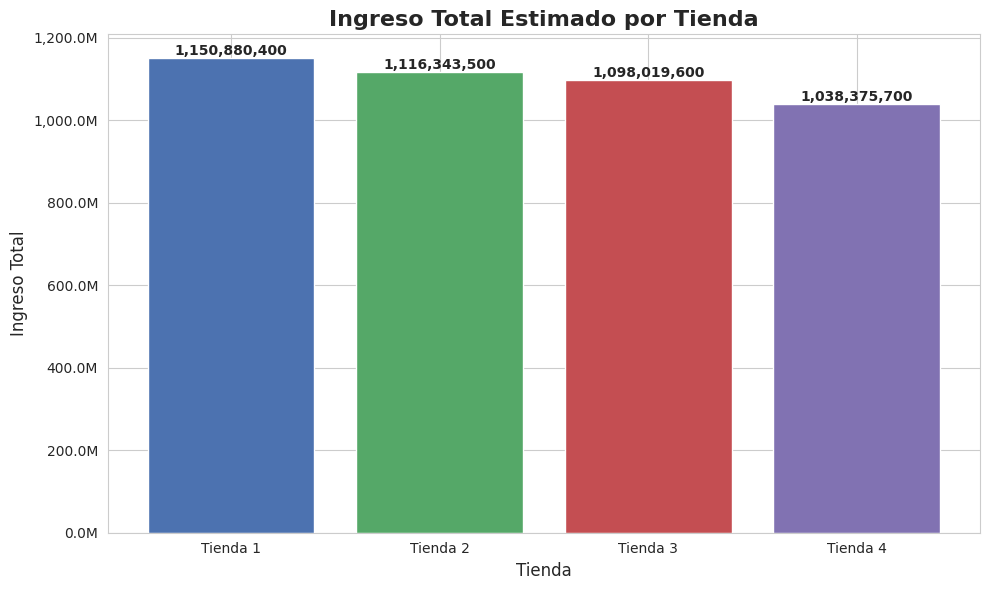

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 1. Datos de ingresos totales (suma de la columna 'Precio')
data = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total': [1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]
}
df_ingresos = pd.DataFrame(data)

# 2. Configuración del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# 3. Crear el gráfico de barras
bars = plt.bar(df_ingresos['Tienda'], df_ingresos['Ingreso Total'], color=['#4C72B0', '#55A868', '#C44E52', '#8172B2'])

# 4. Etiquetas y título
plt.title('Ingreso Total Estimado por Tienda', fontsize=16, weight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingreso Total', fontsize=12)

# Función para formatear el eje Y en millones (M)
def millions_formatter(x, pos):
    return f'{x/1e6:,.1f}M'
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# 5. Agregar el valor exacto sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500000,
             f'{yval:,.0f}',
             ha='center', va='bottom', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [46]:
df_list = []
for nombre, df in tiendas.items():
    df['Tienda'] = nombre # Agrega la columna 'Tienda'
    df_list.append(df)

df_consolidado = pd.concat(df_list, ignore_index=True)

# 2. Crear la tabla cruzada (Crosstab) para el conteo de ventas
# Cuenta las filas (transacciones) agrupadas por Tienda y Categoría
ventas_por_categoria_por_tienda = pd.crosstab(
    df_consolidado['Tienda'],
    df_consolidado['Categoría del Producto'],
    margins=True,
    margins_name='Total General'
)

# 3. Mostrar el resultado
print("Ventas por Categoría en Cada Tienda (Cantidad de Transacciones):")
print(ventas_por_categoria_por_tienda)

Ventas por Categoría en Cada Tienda (Cantidad de Transacciones):
Categoría del Producto  Artículos para el hogar  Deportes y diversión  \
Tienda                                                                  
Tienda 1                                    171                   284   
Tienda 2                                    181                   275   
Tienda 3                                    177                   277   
Tienda 4                                    201                   277   
Total General                               730                  1113   

Categoría del Producto  Electrodomésticos  Electrónicos  \
Tienda                                                    
Tienda 1                              312           448   
Tienda 2                              305           422   
Tienda 3                              278           451   
Tienda 4                              254           451   
Total General                        1149          1772   

Categoría

### GRÁFICO:

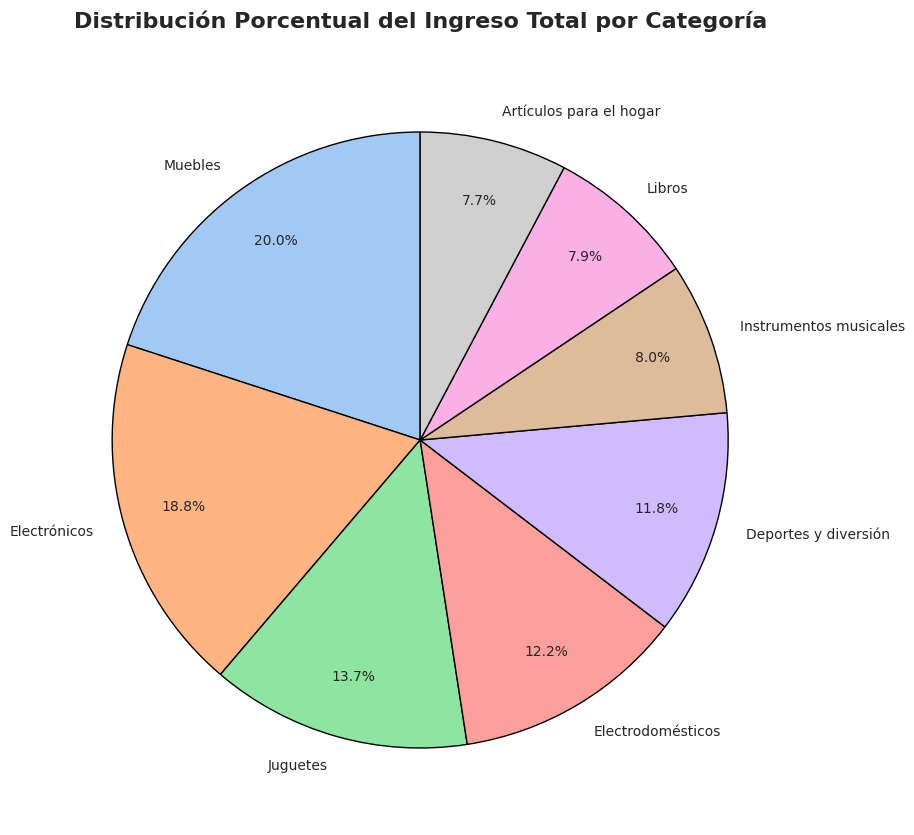

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de Ingreso Total por Categoría (suma de la columna 'Precio' de las 4 tiendas)
data = {
    'Categoría del Producto': ['Electrodomésticos', 'Electrónicos', 'Muebles',
                               'Artículos para el hogar', 'Deportes y diversión',
                               'Juguetes', 'Instrumentos musicales', 'Libros'],
    'Ingreso Total': [1149, 1772, 1886, 730, 1113, 1290, 753, 742]
}
df_categorias = pd.DataFrame(data)

# Ordenar por Ingreso Total (descendente) para que el gráfico inicie con la porción más grande
df_categorias = df_categorias.sort_values(by='Ingreso Total', ascending=False)

# Crear el gráfico de torta
plt.figure(figsize=(10, 10))
plt.pie(
    df_categorias['Ingreso Total'],
    labels=df_categorias['Categoría del Producto'],
    autopct='%1.1f%%',  # Muestra el porcentaje con un decimal
    startangle=90,      # Inicia el primer segmento en la parte superior
    colors=sns.color_palette("pastel"), # Define la paleta de colores
    wedgeprops={"edgecolor": "black", 'linewidth': 1, 'antialiased': True}, # Mejora bordes
    pctdistance=0.8 # Distancia de los porcentajes del centro
)

# Título en español y ajuste final
plt.title('Distribución Porcentual del Ingreso Total por Categoría', fontsize=16, weight='bold', pad=20)
plt.ylabel('') # Eliminar la etiqueta 'Ingreso Total' del eje Y
plt.show()

# 3. Calificación promedio de la tienda


In [48]:
df_list = []
for nombre, df in tiendas.items():
    df['Tienda'] = nombre
    df_list.append(df)

df_consolidado = pd.concat(df_list, ignore_index=True)

# 1. Asegurar que 'Calificación' sea numérica
df_consolidado['Calificación'] = pd.to_numeric(df_consolidado['Calificación'], errors='coerce')

# 2. Calcular la calificación promedio por tienda y ORDENAR por el nombre de la tienda
calificacion_por_tienda = df_consolidado.groupby('Tienda').agg(
    Calificacion_Promedio=('Calificación', 'mean')
).sort_values(
    by='Tienda',  # Ordenar por el nombre de la tienda (alfabéticamente: T1, T2, T3, T4)
    ascending=True
).reset_index()

# 3. Mostrar el resultado
print("Calificación Promedio de los Clientes por Tienda (Ordenado por Tienda):")
print(calificacion_por_tienda.to_markdown(index=False, floatfmt=".2f"))

Calificación Promedio de los Clientes por Tienda (Ordenado por Tienda):
| Tienda   |   Calificacion_Promedio |
|:---------|------------------------:|
| Tienda 1 |                    3.98 |
| Tienda 2 |                    4.04 |
| Tienda 3 |                    4.05 |
| Tienda 4 |                    4.00 |


### GRÁFICO:

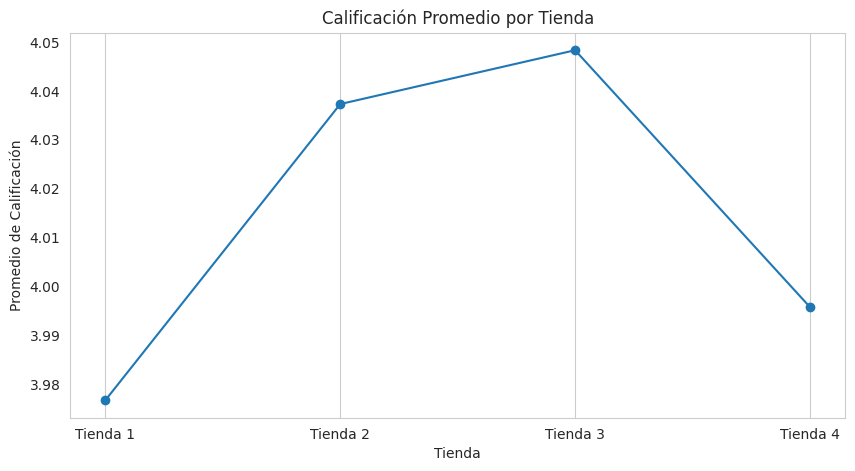

In [58]:
plt.figure(figsize=(10,5))
# Trazar el gráfico de líneas con estilo personalizado
plt.plot(
    ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], promedios, marker='o')
plt.title('Calificación Promedio por Tienda')
plt.ylabel('Promedio de Calificación')
plt.xlabel('Tienda')
plt.grid(axis='y')
plt.show()

# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda